- Linear Algebra is branch of mathematics that studies [vector spaces](https://en.wikipedia.org/wiki/Vector_space) and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it (i.e moving it), etc.  

- Machine Learning relies heavily on Linear Algebra, so it is essential to understand what vectors and matrices are, what operations you can performn with them , and how useful can they be. 


## Vectors:   

### Definition: 

A vector is a quantity defined by a magni9tude and direction.  
For examples, rocket's velocity is a 3-dimensional vector: It's magnitude is the speed of the rocket, and it's direction is (hopefull) up.  
A vector can be represented by an array of numbers called _scalars_.  
Each scalar corresponds to the magnitude of the vector with regards to each dimension.  

For example, say the rocket is goin uo at a slight angle:  it has a vertical speed of 5,000 m/s, and also a slight speed towards East at 10 m/s, and a slight speed towards North at 50 m/s.  
The rocket's velocity may be represented by the following vector: 

**velocity** $= \begin{pmatrix}
10 \\
50 \\
5000 \\
\end{pmatrix}$  


This vector could represent a video that lasts 10.5 minutes, but only 5.2% viewrs watch more than a minute, it get 3.25 views per day on average, and it was flagged 7 times as spam.  
- __As you can see, each axis may have a different meaning__ . 

Based on this vector, out Machine Learning system may predict that there is an 80% probability that it is a spam video, 18% that it is a clickbait, and 2% that it is a good video. This could be represented by the following vectors. 


**class_probabilities** $= \begin{pmatrix}
0.80 \\
0.18 \\
0.02
\end{pmatrix}$


### Vectors in Python: 

In Python, a vector can be represented in many ways, the simplest being a regular python list of numbers. 

In [1]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Since we plan to do quite a lot of scientific calculations, it is much better to use NumPy's `ndarray` , which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors. 

In [2]:
import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([ 10.5 ,   5.2 ,   3.25,   7.  ])

The size(number of elements) of a vector can be obtained by using the `size`  attribute. 

In [3]:
video.size

4

The $ i^th $ element (also called the  entry or item) of a vector __v__, is denoted by __v$ _i $__.  

Note that indices in mathematics generally start at 1, but in programming they usually start at 0. 
So to acess __video__$_3$, we could programatically write: $

In [4]:
video[2] # # 3rd element

3.25

## Plotting vectors: 

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

### 2D vectors:  
- Let's start of with a couple, pretty simple vectors to plot. 


In [6]:
u = np.array([2,5])
v = np.array([3,1])


- These vectors each have 2 elements, so they can easily be represented graphically on a 2D graph, for example as points: 
- You can assign multiple names to multiple elements in a list/ array. 

```python
x , y, z = [1,2,3]
x
#>> 1

y
# >> 2

z
#>> 3
```

x_coords  (3, 2)
y_coords  (1, 5)


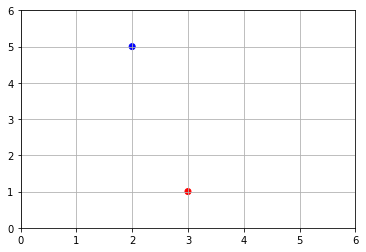

In [7]:
x_coords, y_coords = zip(v,u)
print("x_coords ", x_coords)
print("y_coords ", y_coords)

# plt.scatter(x = x_coords, color = "r", y= y_coords, 
# color = "b" )
# NODOUBT >> YOU CANNOT REPEAT A KEYWORD ARGUMENT

plt.scatter(x_coords, y_coords, color = ["r", "b"])
plt.axis([0,6,0,6])
plt.grid()
# >> Plotting points (3,1) and (2,5)

- Vectors can also be represented as arrows. Let's create a small convenience function to draw nice arrows. 
- Side Note: 
    - If you want a function to accept different kinds of arguments, the parameter that acceps an arbitrary number of arguments must be placed last in the function definition.  
    - Python Matches positional, and keywords arguments first, and then collects any remaining arguments in the parameter. 
    - The only difference between using a $*$ and a $**$ is that you use a $**$, when your functions takes both postional and arbitrary number of arguments. 
    
```python

def make_pizza(size, *toppings):
    """Summarize the pizza we are about to make."""
    print("\nMaking a " + str(size) +
          "-inch pizza with the following toppings:")
    for topping in toppings:
        print("- " + topping)
make_pizza(16, 'pepperoni')
make_pizza(12, 'mushrooms', 'green peppers', 'extra cheese')

# Making a 16-inch pizza with the following toppings:
# - pepperoni
# Making a 12-inch pizza with the following toppings:
# - mushrooms
# - green peppers
# - extra cheese

```

In [8]:
def plot_vector2d(vector2d, origin = [0,0], **options):
    return plt.arrow(origin[0], origin[1], # (x1,y1) Start Point
                     vector2d[0],vector2d[1], # (x2, y2) End Point
                     head_width = 0.2, 
                     head_length = 0.3,
                     length_includes_head = True, 
                     **options)

Now, let's draw the vectors __u__ and __v__ as arrows. 

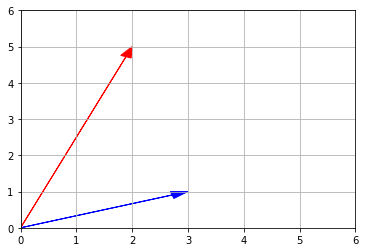

In [9]:
plot_vector2d(u, color = 'r')
# Here color is an arbitrary argument that is added 
# through **options
plot_vector2d(v, color = "b")
plt.axis([0,6,0,6])
plt.grid()

### 3D vectors: 
- Plotting 3D vectors is also relatively straightforward. Let's create two 3D vectors: 

In [10]:
a = np.array([1,2,8])
b = np.array([5,6,3])


x_coords  (1, 5)
y_coords  (2, 6)
z_coords  (8, 3)


[0, 6, 0, 7]

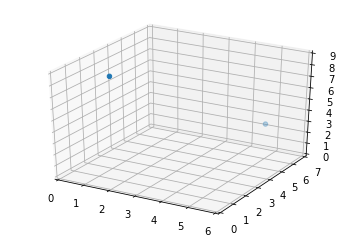

In [11]:
from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection = '3d')
# >> Creating a 3d subplot object

x_coords, y_coords, z_coords = zip(a,b)
print("x_coords ", x_coords)
print("y_coords ", y_coords)
print("z_coords ", z_coords)

subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0,9])
# >> zmin, zmax

subplot3d.axis([0,6,0,7,])
# >> xmin, xmax, ymin, ymax

It's a bit hard to visualise exactly wherr in space these two points are, so let's add vertical lines. 

We;ll create a small convenience function to plot a list of 3d vectors with vertical lines attached: 

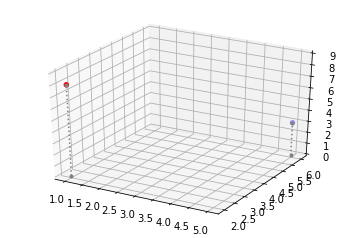

In [12]:
subplot3d = plt.subplot(111, projection = '3d')

def plot_vectors3d(ax, # The subplot
                   vectors3d, # List of 3d vectors you want
                   # to plot
                   z0 ,# The starting value of z
                   **options # Arbitrary number of additional
                   # arguments
                  ):
    for v in vectors3d:
        x, y, z = v
        # Assigns x , y, z to the 3 numbers in the vector
        
        ax.plot([x,x], [y,y], [z0,z], color = "gray",
               linestyle = "dotted", marker = ".")
        # Will draw a line between (x,y,z0) and 
        # (x,y,z)
        
    x_coords, y_coords, z_coords = zip(*vectors3d)
    # x_coords = (1,5)
    # y_coords = (2,6)
    # z_coords = (3,8)
    # * unpacks the list of vectors 3d as there
    # could be arbitrary number of them
    # >> zip([1,2,3],[5,6,8]) instead of
    # zip([[1,2,3], [4,5,6]])
    
    
    ax.scatter(x_coords, y_coords, z_coords, **options)
    # Plots point (1,2,3)
    # Plots point (5,6,8) 

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

# Norm:  
- The norm of a vector __u__, not __||u||__ is a __measure of the length__ (a.k.a the maginitude) of __u__. 
- There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as: 

# $\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$
- The square root of the ( sum of the squares of each element of the vector). 
- This formula comes directly from the distance formula, which in turn comes from the pythagoreas theorem. 

- We could implement this easily in pure python, recalling the $\sqrt{x} = x^{\frac{1}{2}} $

In [13]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    norm = sum(squares)**0.5
    return norm

print("||",u,"|| = ")
print(vector_norm(u))

|| [2 5] || = 
5.38516480713


However, it is much more efficient to use NumPy's `norm` function, available in the `linalg` (__Lin__ear __Alg__ebra) module: 

In [14]:
import numpy.linalg as LA
LA.norm(u)

5.3851648071345037

- Lets plot a little diagram to confirm that the legnth of vector __v__ is indeed $\approx$ 5.4
- Note: 
    - pyplot keeps track of the currently active subplot (which you can get a reference to by calling `plt.gca()`), so when you call the `plot` function, it draws on the *active* subplot.


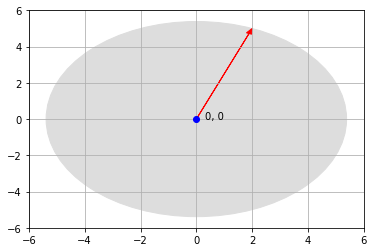

In [15]:
radius = LA.norm(u)
# >> Going to use a circle to determine if the length of 
# the vector is infact 5.4

circle = plt.Circle((0,0), radius , color = "#DDDDDD")
# >> Does not plot it yet. 

plt.gca().add_artist(circle)
# >> Draws the circle on the current subplot. 

plt.axis([-6,6,-6,6])
plot_vector2d(u, color="red")

plt.plot(0,0, 'bo')
plt.annotate("0, 0", xy = (0,0), xytext = (0.3,0))
plt.grid()


Looks about right! 

### [Addition and Subtraction of 2 vectors](https://www.khanacademy.org/math/precalculus/vectors-precalc/vector-addition-subtraction/v/adding-and-subtracting-vectors )
- Vectors of the same size can be added together. 
- Addition is performed _elementwise_: 
- We can add two vectors by joining 1s head (starting point) , to the other's tail (end point) , given that that the 2nd vector's head(starting point) starts at the first vector's tail (end point). 




In [16]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

- Let's look at what the vector addition look like graphically: 

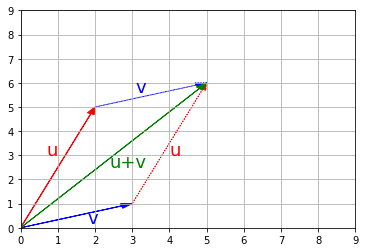

In [17]:
plot_vector2d(u, color = "r", label = str(u))
plot_vector2d(u, origin = v, color = "r", 
              linestyle = "dotted")

plot_vector2d(v, color = "b", label = str(v))
plot_vector2d(v, origin = u, color = "b", 
              linestyle = "dotted")

plot_vector2d(u+v, color = "g", label = str(u+v))

plt.axis([0,9,0,9])

plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()

Vector addition is __commutative__, meaning that __u + v  = v + u __.  
You can see it on the previous image: following __u__ _then_, __v__ leads to the same points as following __v__ _then_,  __u__.  

Vectors addition is also __associative__, meaning that __ (u + v) + w = u + (v + w) 

### [Geometric Translation](https://en.wikipedia.org/wiki/Translation_%28geometry%29): 
- [Performing translations in 2d](https://www.khanacademy.org/math/basic-geo/basic-geo-transformations-congruence/basic-geometry-translations/v/translation-example)

- If you have a shape defined by a number of points(vectors), and you add a vector __v__ to all of these points, then the whole shape gets shifted by __v__.  
This is called a geometric translation.  


In [18]:
v

array([3, 1])

In [19]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1,2])

x_coords , y_coords = zip(t1, t2, t3, t1)
print("x_coords ", x_coords)
print("y_coords ", y_coords)

x_coords  (2.0, 2.5, 1, 2.0)
y_coords  (0.25, 3.5, 2, 0.25)


[0, 6, 0, 5]

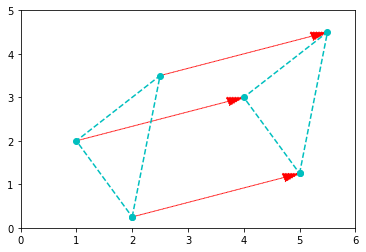

In [20]:
fig1, ax = plt.subplots(1,1)
ax.plot(x_coords, y_coords, "c--", )
# >> Plot a triangle using the x and y coordinates. 
ax.plot(x_coords, y_coords, "co")
# >> Highlights the vertices of the triangle. 

plot_vector2d(v, t1, color = "r", linestyle = ":")
# >> Plots v, i.e[3,1] using point t1 [2,0.25] as origin. 
plot_vector2d(v, t2, color = "r", linestyle = ":")
# >> Plots v, i.e[3,1] using point t1 [2.5 ,3.5] 
# as origin. 
plot_vector2d(v, t3, color = "r", linestyle = ":")
# >> Plots v, i.e [3,1] using point t3[1,2] as origin. 

# Notice, all vector v's are parallel to each other. 

# Creating coordinates for second triangle
# (translated triangle). 

t1b = t1 + v
# >> [ 5.    1.25]

t2b = t2 + v
# >> [ 5.5  4.5]

t3b = t3 + v
# >> [4 3]

x_coords_b , y_coords_b = zip(t1b, t2b, t3b, t1b)
# >> x_coords_b  (2.0, 2.5, 1, 2.0)
# >> y_coords_b  (0.25, 3.5, 2, 0.25)

# Plotting the second triangle using dotted lines. 

ax.plot(x_coords_b, y_coords_b, "c--", )
ax.plot(x_coords_b, y_coords_b, "co")

# Setting the min, max of axes. 
plt.axis([0,6,0,5])

### Subtraction: 
- Finally, subtracting a vector is just like adding the opposite vector: 

[-2, 5, 0, 6]

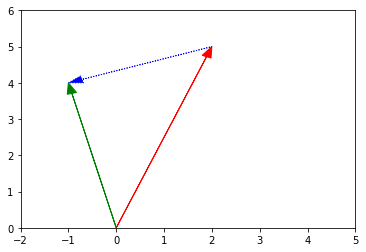

In [21]:
plot_vector2d(u, color = "r", label = str(u))
plot_vector2d(-v, origin = u, color = "b", 
              linestyle = "dotted")
plot_vector2d(u-v, color = "g", label = str(u-v))
plt.axis([-2,5,0,6])

[-1, 5, -4, 2]

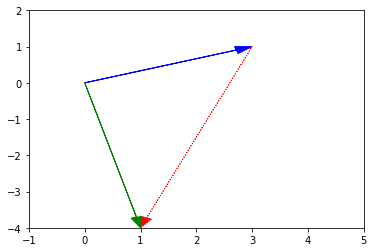

In [22]:
plot_vector2d(v, color = "b", label = str(v))
plot_vector2d(-u, origin = v, color = "r", 
              linestyle = "dotted")

plot_vector2d(v-u, color = "g", label = str(u-v))

plt.axis([-1,5,-4,2])

- Subracting one vector from another gives the vector that joins the head (start point) of vector 1 and tail (end point) of {minus vector 2}. 

### Multiplication by scalar: 
- Vectors can be multiplied by scalars. All elements in the vector are multiplied by the number, for example: 

In [23]:
print("1.5 *", u, "=")
1.5 * u

1.5 * [2 5] =


array([ 3. ,  7.5])

- Graphically, scalar multiplication results in changing the scale of a figure, hence the name _salar._ 
- The distance from the origin is also multiplied by the scalar. 
- For examples, let's scale up by a factor of k = 2.5


In [24]:
t1, t2, t3

(array([ 2.  ,  0.25]), array([ 2.5,  3.5]), array([1, 2]))

In [25]:
k = 2.5
t1c , t2c, t3c = t1 * k , t2*k , t3*k
t1c, t2c, t3c

(array([ 5.   ,  0.625]), array([ 6.25,  8.75]), array([ 2.5,  5. ]))

In [26]:
x_coords, y_coords

((2.0, 2.5, 1, 2.0), (0.25, 3.5, 2, 0.25))

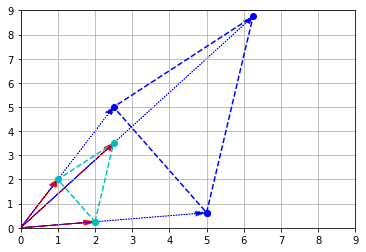

In [27]:
plt.plot(x_coords, y_coords, "c--",
        x_coords, y_coords, "co")
# >> Plotting the triangle formed by x_coords, y_coords 
# which are the orginal coordinates derived from 
# vectors t1, t2, t3


plot_vector2d(t1, color = "r")
plot_vector2d(t2, color = "r")
plot_vector2d(t3, color = "r")
# >> Plotting the 3 vectors, from the origin. 

# >> Getting the coordinates of the new triangle
# formed after sclar multiplication. 
x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
x_coords_c, y_coords_c
# >> ((5.0, 6.25, 2.5, 5.0), 
# >> (0.625, 8.75, 5.0, 0.625))


# Plotting the new triangle formed after multiplying
# each of the vectors/ coordinated by k. 

plt.plot(x_coords_c , y_coords_c , "b--",
        x_coords_c , y_coords_c , "bo")

# PLotting the scalar vectors with blue dotted lines.
plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

# Setting the min max of axes. 
plt.axis([0, 9, 0, 9])

plt.grid()

- Notice, multiplying a vector by a scalar..just increased its length(maginitude), not direction. 
- scaled it. 
- It points in the same directions , just are 2.5 times longer , or have 2.5 times the magnitude. 


- As you might guess, dividing a vector by a scalar is equivalent to multiplying by its inverse:  

$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

Scalar multiplication is **commutative**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

It is also **associative**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Finally, it is **distributive** over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

## Zero, unit and normalized vectors: 
- A __zero-vector__ is full of 0s.
- a __[unit-vector](https://www.khanacademy.org/math/precalculus/vectors-precalc/unit-vectors/v/intro-unit-vector-notation)__ is a vector with a norm / magnitude equal to 1.
    - If we are in 2 dimensions, we define a unit vector for each of the dimensions we are operating in.
        - $\hat{i}$ = [1,0] : only goes in the horizontal direction. It is the unit vector in the horizontal direction. 
        - $\hat{j}$ = [0,1] : only goes in the vertical direction. It is the unit vector in the vertical direction. 
        - For eg: $ \vec{v} = 3\hat{i} + 1\hat{j} $ is the same as saying  $ \vec{v} = [3,1] $.  
        - It says that we move 3 in the x (horizontal direction, and 1 in the y (vertical direction). 
        - Adding the 2 vectors, $ 3\hat{i} $ and $  1\hat{j} $ , you get the vector that starts from the head of $ 3\hat{i} $, and ends at the tail of $ 1\hat{j} $, which is the same thing as a  vector starting from the origin to the points (3,1) in 2 dimensional space. 
        - This is why we do element wise addition. It is because when adding two vectors: 
            - For eg: $ [3\hat{i} + 1\hat{j}] + [2\hat{i} + 4\hat{j}]  $
            - = $ (3 + 2)\hat{i} + (1 + 4)\hat{j} $ 
            - We add the vectors which go in the same direction.  
            
            
- The __[normalized-vector](https://www.khanacademy.org/math/precalculus/vectors-precalc/unit-vectors/v/unit-vector-intro)__ of a non-null vector __u__, noted $\hat{\textbf{u}}$, us the unit vector that points in the same direction as __u__.   
    - It is equal to $\hat{\textbf{u}} = \hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$
    - Involves scaling the vector down to have a magnitude of 1. 
    - That is the normalized vector of u is equal to u, dived by its maginitude. 
    

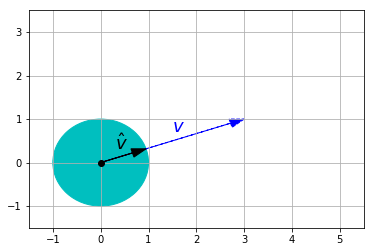

In [28]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
# >> Adds a circles at origin, with radius 1 ( unit circle)
# and color = cyan

plt.plot(0, 0, "ko")
# >> Highlights the origin point in black

plot_vector2d(v, color="b", linestyle="--")
# >> Plots the vector v in blue color, using a dotted 
# line. 

plot_vector2d(v / LA.norm(v), color="k")
# >> Plots the normalized vector of v, in black color. 

plt.text(0.3, 0.3, "$\hat{v}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$v$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## [Dot Product](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length):  
### Definition: 

- The dot product (also called *scalar product* or *inner product* in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:
    
    - $\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$
    - The maginitude of __u__ multiplied by the magintufde of __v__ multiplied by $ cos(\theta) $.
        - where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

- Another way to calculate the dot product is:
    - $\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$
- Both vectors need to be of the same dimension. 

### In python
The dot product is pretty simple to implement:

In [29]:
def dot_product(v1, v2): 
    sum_ = 0
    for v1i, v2i in zip(v1 , v2):
        # Element wise multiplication, and the 
        # addition of all the products. 
        print(sum_ ,'+ (', v1i, '*', v2i, ')')
        sum_ += v1i * v2i 
        print('=', sum_)
    return sum_

dot_product(u, v)


0 + ( 2 * 3 )
= 6
6 + ( 5 * 1 )
= 11


11

 But a much more efficient implementation is provided by NumPy with the `dot` function: 

In [30]:
np.dot(u,v)

11

Equivalently, you can use the `dot`method on `ndarray`s. 

In [31]:
v.dot(v)

10

__Caution:__ the $*$ operator will perform the _elementwise_ multiplication, NOT a dot product. 
- The $*$ operator does not add up the products of the _elementwise_ multiplication. 
    - It takes array as inputs, and outputs an array. 
- The dot product takes the element wise products , and adds them. 

In [32]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

print(u * v)

print("  ",u)
print(". ",v, "(Dot product)")
print("-"*10)

print(u.dot(v))
print("..which is the same as 6 + 5. ")


   [2 5]
*  [3 1] (NOT a dot product)
----------
[6 5]
   [2 5]
.  [3 1] (Dot product)
----------
11
..which is the same as 6 + 5. 


__[Main Properties](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/proving-vector-dot-product-properties)__: 
- comuutative, __u.v = v.u__
- dot product is only defined between two vectors, not a vector and a scalar. 
    - Therefore, we cannot chain  the dot products like __u.v.w__, cause __u.v__ will be a scalar, and __w__ is a vector. 
- Therefore, the dot product is __not associative:__
    - $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ since neither are defined.
- However, the dot product is **associative, with regards to scalar multiplication: **
    -  $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$

In [33]:
print(5 * u.dot(v))
# >> 55

print(5*u.dot(v))
# >> 55 

print(u.dot(5*v))
# >> 55

55
55
55


__[Calculating the angle between vectors](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/defining-the-angle-between-vectors):__ 

- One of the many uses of the dot product is to calculate the angle between two non-zero vectors.   
- Looking at the dot product definition: 
$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$
    - We can deduce: 
    $\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

- Note that, if __u.v__ = 0, it follows the $ \theta = \frac{\pi}{4} $. 
    - $ cos^{-1} \frac{\pi}{4}  = {90}$
    - In other words, if the dot product of two non-null vectors is 0, it means that they are orthogonal (involving right angles). 
- Let's use this property to calculate the angle between a __u__ and __v__ (in radians). 

[What is a radian?](https://www.khanacademy.org/math/algebra2/trig-functions/intro-to-radians-alg2/v/introduction-to-radians)
- The angle $\theta$ is equal to the length of the arc, in terms of radius, r. 
- If we go full circle, we $\theta = 2\pi $ radians. 
- $2\pi $ radians = 360 degrees
- $\pi$ radians = 180 degrees

In [34]:
u,v

(array([2, 5]), array([3, 1]))

In [35]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.868539395286 radians
      = 49.7636416907 degrees


Note: due to small floating point errors, `cos_theta` may be very slightly outside of the interval [-1, 1] , which would make `arcos` fail. 
- This is why we clipped the value within the rannge using NumPy's clip function. 

### [Projecting a point onto an axis](https://www.khanacademy.org/math/linear-algebra/matrix-transformations/lin-trans-examples/v/introduction-to-projections): 
- The dot product is also very useful to project points onto an axis. 
- The projection of vector __v__ onto __u__'s axis is given by the formula: 
- $\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

    - The dot product of u and v  (scalar) 
        - multiplied by the vector being projected on, (scalar x vector = vector) 
            - divided by the square of the maginitude of the vector being project on. (vector / scalar = vector) 
- Output: Vector, which is projection of one on the other. 

- Which is equivalent to:

    - $\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$
        - Dot product of __v__ and normalized __u__, multiplied by normalized __u__. 
        

[2 5]


[0, 8, 0, 5.5]

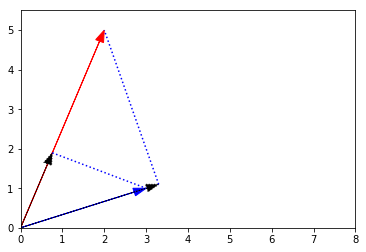

In [123]:
print(u)
# >> [2,5]

u_normalized = u / LA.norm(u)
# >> [ 0.37139068  0.92847669]

proj = v.dot(u_normalized)*u_normalized
# >> [ 0.75862069  1.89655172]

plot_vector2d(u, color = "r")
# >> Plotting vector u
plot_vector2d(v, color = "b")
# >> Plotting vector v

plot_vector2d(proj, color = "k", linestyle = ":")
# >> plottin the projection of v, on u. 

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")
# >> Connecting the tip of vector v to the tip of 
# projection of v on u. 

v_normalized = v/LA.norm(v)
proj = u.dot(v_normalized)*v_normalized
plot_vector2d(proj, color = "k", linestyle = ":")
# >> plottin the projection of u, on v. 

plt.plot([proj[0], u[0]], [proj[1], u[1]], "b:")
# >> Connecting the tip of vector u to the tip of 
# projection of u on v. 

plt.axis([0, 8, 0, 5.5])

In [126]:
print(u)
print(v)
print(vector_norm(proj))
print(np.dot(u,v))
vector_norm(proj)*vector_norm(v) == np.dot(u,v)

[2 5]
[3 1]
3.47850542619
11


True

In [131]:
u = np.array([2,4])
u

array([2, 4])

In [128]:
v

array([3, 1])

In [132]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.785398163397 radians
      = 45.0 degrees


## Proving that $ u.v == |a|\times |b|\times cos\theta $

In [133]:
np.dot(u,v)

10

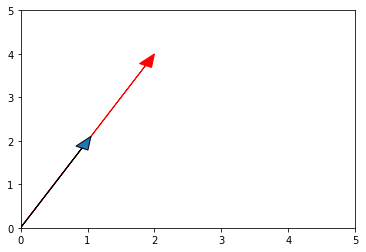

In [138]:
plot_vector2d(u, color = "r")
plt.axis([0,5,0,5])
plot_vector2d(u*np.cos(45))

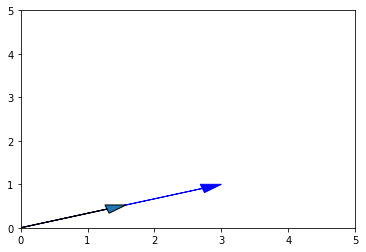

In [139]:
plot_vector2d(v, color = "b")
plt.axis([0,5,0,5])
plot_vector2d(v*np.cos(45))

## Matrices: 

- A matrix is a rectangular array of scalars (i.e any number: integer, real or complex) arranged in rows and columns, for example: 
    \begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}
    
- You can think of a matix as a list of vectors: the previous matrix contains either 2 horizontal 3D vectors, or 3 vertical 2D vectors.   

- Matrices are convenient and very efficient to run operations on many vectors at a time. 
- We will also see that they are great at representing and performing linear transformations, such as rotations, translations, and scaling. 



### Matrices in pthon: 
In python, a matrix can be represented in various ways. 
- The simplest is just a list of python lists. 

In [37]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

- Numpy

In [38]:
A = np.array(
    [
    [10, 20, 30],
    [40, 50, 60]
]
)
A

array([[10, 20, 30],
       [40, 50, 60]])

- By convention, matrices generally have uppercase names, such as A. 
- In the rest of this tutorial, we will assume that we are using NumPy arrays (type `ndarray`) to represent matrices. 



### Size:
- The size of a matrix is defined by its number of rows and number of columns, __not by the number of elements it has, like it is in NumPy arrays.__
- It is notes as _rows_ $\times$ _columns_.
    - Matrix A is a 2 x 3 matrix. 2 rows and 3 columns. 
    

- To get the size of a matrix, use `np.ndarray.shape`

In [39]:
A.shape

(2, 3)

In [40]:
A.size

6

### Element Indexing: 
- The number located in the $i^{th}$ row, and $j^{th}$ column of a matrix $X$ is sometimes noted $X_{i,j}$ or $X_{ij}$, but there is no standard notation, so people often prefer to explicitely name the elements, like this:
    - ### "*let $X = (x_{i,j})_{1 ≤ i ≤ m, 1 ≤ j ≤ n}$*". This means that $X$ is equal to:

$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$
- m is the number of rows here, n is the number of columns. 
- However in this notebook we will use the $X_{i,j}$ notation, as it matches fairly well NumPy's notation. 
- Note that in math indices generally start at 1, but in programming they usually start at 0. 
- So to access $A_{2,3}$ programmatically, we need to write this:

In [41]:
A[1,2] # 2nd row, 3rd column

60

- The $i^{th}$ row vector is sometimes noted $M_i$ or $M_{i,*}$, but again there is no standard notation so people often prefer to explicitely define their own names, - for example: "*let **x**$_{i}$ be the $i^{th}$ row vector of matrix $X$*".
- We will use the $M_{i,*}$, for the same reason as above. - For example, to access $A_{2,*}$ (ie. $A$'s 2nd row vector):

In [42]:
A[1, :] # 2nd row, all columns 
        # Row 1, all columns
        # 2nd row vector

array([40, 50, 60])

- Similarly, the  jthjth  column vector is sometimes noted  MjMj  or  M∗,jM∗,j , but there is no standard notation. We will use  M∗,jM∗,j . For example, to access  A∗,3A∗,3  (ie.  AA 's 3rd column vector):

In [43]:
A[:,2] # All rows, 3rd colum
       # All rows, Column 2
       # 3rd column Vector

array([30, 60])

Note that the result is actually a one-dimensional NumPy array. 
There is __no such thing__ as a _vertical_ or a _horizontal_ one-dimensional array. 
- If you need to actually represent a row vector as one-row matrix (i.e a 2D NumPy array), 
- or a column vector as a one-column matrix, then you need to use a slice instead of an integer when accessing the row or column, for example: 


In [44]:
# Accessing the same column vector using different 
# indexing: 
A[:, 2:3], A[:, 2] # All rows, 3rd colum
                   # All rows, Column 2
                   # 3rd column Vector

(array([[30],
        [60]]), array([30, 60]))

In [45]:
# Accessing the same row vector using different indexing: 
A[1:2, :], A[1, :] # 2nd row, all columns 
                   # Row 1, all columns
                   # 2nd row vector

(array([[40, 50, 60]]), array([40, 50, 60]))

## Square, triangular, diagonal and identity matrices
A **square matrix** is a matrix that has the same number of rows and columns, for example a $3 \times 3$ matrix:

\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}

An **upper triangular matrix** is a special kind of square matrix where all the elements *below* the main diagonal (top-left to bottom-right) are zero, for example:

\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}

Similarly, a **lower triangular matrix** is a square matrix where all elements *above* the main diagonal are zero, for example:

\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}

A **triangular matrix** is one that is either lower triangular or upper triangular.

A matrix that is both upper and lower triangular is called a **diagonal matrix**, for example:

\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}

You can construct a diagonal matrix using NumPy's `diag` function:

In [46]:
np.diag([4,5,6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

If you pass a matrix to a `diag` function, it will happily extract the diagonal values: 

In [47]:
D = np.arange(9).reshape(3,3)
print(D)
print("Diagonal Elements: ")
np.diag(D)
              

[[0 1 2]
 [3 4 5]
 [6 7 8]]
Diagonal Elements: 


array([0, 4, 8])

Finally, the **identity matrix** of size $n$, noted $I_n$, is a diagonal matrix of size $n \times n$ with $1$'s in the main diagonal, for example $I_3$:

\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}

Numpy's `eye` function returns the identity matrix of the desired size:

In [48]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

- The identity matrix is often noted simply $I$ (instead of $I_n$) when its size is clear given the context. 
- It is called the *identity* matrix because multiplying a matrix with it leaves the matrix unchanged as we will see below.

### Adding matrices
- If two matrices $Q$ and $R$ have the same size $m \times n$, they can be added together. 
- Addition is performed *elementwise*: the result is also a $m \times n$ matrix $S$ where each element is the sum of the elements at the corresponding position: $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$

For example, let's create a $2 \times 3$ matric $B$ and compute $A + B$:

In [49]:
B = np.array([[1,2,3],
            [4,5,6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [50]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [51]:
A + B 

array([[11, 22, 33],
       [44, 55, 66]])

__Addition is commmutative, __ meansing that A + B = B + A. 

In [52]:
B + A

array([[11, 22, 33],
       [44, 55, 66]])

__It is also associative,__ meaning, A + (B + C) = ( A + B) + C: 

In [53]:
C = np.arange(6).reshape(2,3)
C

array([[0, 1, 2],
       [3, 4, 5]])

In [54]:
A + (B + C)


array([[11, 23, 35],
       [47, 59, 71]])

In [55]:
( A + B) + C


array([[11, 23, 35],
       [47, 59, 71]])

## Scalar Multiplication:  

- A matrix `M` can be multiplied by a scalar,  $\lambda$. 
- The result is noted $\lambda M $, and it is a matrix of the same size as `M` with all elements multiplied by $\lambda$. 

- A matrix $M$ can be multiplied by a scalar $\lambda$. The result is noted $\lambda M$, and it is a matrix of the same size as $M$ with all elements multiplied by $\lambda$:

$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$

- A more concise way of writing this is:

    - $(\lambda M)_{i,j} = \lambda (M)_{i,j}$

- In NumPy, simply use the `*` operator to multiply a matrix by a scalar. For example:

In [56]:
2 * A
# >> Broadcasting Rules apply..
# Rule1: 
# [2] * A
# (1,) * (2,3) # NP

# Rule1: 
# [[2]] * A
# (1,1) * (2,3) # NP

# Rule2: Extending along columns to match A. 
# [[2] [2] [2]] * A
# (1,3) * (2,3) # NP

# Rule2: Extending along rows to match A. 
# [[2] [2] [2]  *  A
# [2] [2] [2]]  
# (2,3) * (2,3) # Possible 

array([[ 20,  40,  60],
       [ 80, 100, 120]])

- This makes scalar multiplication __commutative.__. 
- Scalar multiplication is also __associative,__ meaning $\alpha(\beta M) = (\alpha \times \beta)M $ where $\alpha, \beta $ are scalars. 
- For example: 


In [57]:
982*(1864*A) == 982*(1864*A)
# >> Both arrays are equal, and by boolean operation
# you get a confirmation about each element being equal. 

array([[ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

-Finally it is __distributive over addition__, meanign that $\lambda (Q + R) = \lambda Q + \lambda R$:

In [58]:
5*(A+B) == 5*A + 5*B

array([[ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

### Matrix Multiplication:  
- __[Cross Product](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/linear-algebra-cross-product-introduction) and Matrix Multiplication are the NOT the same thing. __ 
- So far, matrix operations have been rather intuitive. But multiplying matrices is a bit more involved.  
- A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. 
- It is noted simply $QR$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a sum of products: 
    - $P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

- The element at position $i,j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$.

$P =
\begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$

- __You may notice that each element $P_{i,j}$ is the dot product of the row vector $Q_{i,*}$ and the column vector $R_{*,j}__$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

So we can rewrite $P$ more concisely as:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$


Let's multiply two matrices in NumPy, using `ndarray`'s `dot` method:

$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

In [59]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [60]:
D = np.array([
    [2, 3, 5, 7], 
    [11, 12, 17, 19],
    [23, 29, 31, 37]
])

E = A.dot(D)
E

array([[ 930, 1140, 1320, 1560],
       [2010, 2460, 2910, 3450]])

- Let's check this result by looking at one element, jsut to be sure: 
    - looking at $ E_{2,3} $ , for example, we need to multiply elements in A's 2nd row by elements in D's 3rd column. 
    

In [61]:
40*5 + 50*17 + 60*31

2910

In [62]:
E[1,2]

2910

Looking good! 
You can check the other elements until you get used to the algorithm. 
- We multiplied a $2 \times 3$ matrix by a $3 \times 4$ matrix, so the result is a $2 \times 4$ matrix. The first matrix's number of columns has to be equal to the second matrix's number of rows.
- If we try to multiple $D$ by $A$, we get an error because D has 4 columns while A has 2 rows:

In [63]:
try: 
    D.dot(A)
except ValueError as e:
    print("Value Error: ", e)

Value Error:  shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


- This illustrates the fact that **matrix multiplication is *NOT* commutative**: in general $QR ≠ RQ$
- In order for $QR ≠ RQ$, $QR$ and $RQ$ need to exist. 
- In fact, $QR$ and $RQ$ are only *both* defined if $Q$ has size $m \times n$ and $R$ has size $n \times m$. 
- Let's look at an example where both *are* defined and show that they are (in general) *NOT* equal:

In [64]:
A.shape

(2, 3)

In [65]:
F = np.array([
    [5,2],
    [4,1],
    [9,3]
])
F.shape

(3, 2)

In [66]:
A.dot(F)

array([[400, 130],
       [940, 310]])

In [67]:
F.dot(A)

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

In [68]:
A.dot(F) == F.dot(A)

//anaconda/envs/dlndf/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

On the other hand, __matrix multiplication is associative __( _involving the condition that a group of quantities connected by operators gives the same result whatever their grouping, as long as their order remains the same, _)__, meaning that $Q(RS) = (QR)S$. 

In [69]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
A.shape, D.shape, G.shape

((2, 3), (3, 4), (4, 5))

- As we see, the order needs to be ADG, in order to check associativeness. 
- Checking $(AD)G$

In [70]:
AD = A.dot(D)
AD

array([[ 930, 1140, 1320, 1560],
       [2010, 2460, 2910, 3450]])

In [71]:
AD.dot(G)

array([[21600, 28290, 27300, 31140, 13470],
       [47190, 61830, 59970, 68580, 29250]])

- Checking $A(DG)$

In [72]:
DG = D.dot(G)
DG

array([[ 67,  91,  96, 116,  39],
       [265, 343, 345, 398, 153],
       [521, 684, 648, 734, 334]])

In [73]:
A.dot(DG)

array([[21600, 28290, 27300, 31140, 13470],
       [47190, 61830, 59970, 68580, 29250]])

In [74]:
AD.dot(G) == A.dot(DG)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

- It is also __distributive over addition__ of matrices meaning that $(Q + R)S = QS + RS$. 
- For example: 

In [75]:
A.shape, B.shape, D.shape

((2, 3), (2, 3), (3, 4))

- A and B are of the same order, therefore they will be added. 

In [76]:
(A + B).dot(D)

array([[1023, 1254, 1452, 1716],
       [2211, 2706, 3201, 3795]])

In [77]:
A.dot(D) + B.dot(D)

array([[1023, 1254, 1452, 1716],
       [2211, 2706, 3201, 3795]])

- The product of matrix $M$ by the identity matrix (of matching size) results in the same matrix $M$. 
- More formally, if $M$ is an $m \times n$ matrix, then: 

- $M_{m \times n} I_{n \times n} = M$
- $I_{m \times m} M_{m \times n} = M$

- This is generally written more consiselt (since the size of the identity matrices is unambiguous given the context. 
- $ MI = IM = M $

For example: 

In [78]:
A.shape

(2, 3)

In [79]:
A.dot(np.eye(3))

array([[ 10.,  20.,  30.],
       [ 40.,  50.,  60.]])

In [80]:
np.eye(2).dot(A)

array([[ 10.,  20.,  30.],
       [ 40.,  50.,  60.]])

__Caution:__ NumPy's $*$ operator performs elementwise multiplication, NOT matrix multiplicaiton: 

In [81]:
A * B # NOT a matrix multiplication
      # In fact, it is not possible to do a matrix 
      # multiplication if we get no error while doing
      # elementwise multiplication. 
      # No error means, that A and B's size is same.  

array([[ 10,  40,  90],
       [160, 250, 360]])

__The @infix operator: __  
Python 3.5 [introduced](https://docs.python.org/3/whatsnew/3.5.html#pep-465-a-dedicated-infix-operator-for-matrix-multiplication) the `@` infix operator for matrix multiplication, and NumPy 1.10 added support for it. 
- If you are using Python 3.5+ and NumPy 1.10+, you can simply write `A @ D` instead of `A.dot(D)`, making your code much more readable (but less portable).
- This operator also works for vector dot products.

In [82]:
A.dot(D) == A @ D

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

- Note: `Q @ R` is actually equivalent to `Q.__matmul__(R)` which is implemented by NumPy as `np.matmul(Q, R)`, not as `Q.dot(R)`. 
- The main difference is that `matmul` does not support scalar multiplication, while `dot` does, so you can write `Q.dot(3)`, which is equivalent to `Q * 3`, but you cannot write `Q @ 3` ([more details](http://stackoverflow.com/a/34142617/38626)).

## Matrix Transpose: 

The transpose of a matrix $M$ is a matrix notes $M^T$ such that the $i^{th}$ row in $M^T$ is equal to the $i^{th}$ column in $M$. 

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

In other words, ($A^T)_{i,j}$ = $A_{j,i}$

Obviously, if $M$ is an $m \times n$ matrix, then $M^T$ is an $n \times m$ matrix.

Note: there are a few other notations, such as $M^t$, $M′$, or ${^t}M$.

In NumPy, a matrix's transpose can be obtained simply using the `T` attribute:

In [83]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [84]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

- As you might expect, transposing a matrix twice, returns the original matrix: 

In [85]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

Transposition is distributive over addition of matrices, meaning that $(Q + R)^T = Q^T + R^T$. 
For example: 

In [86]:
A.shape, B.shape

((2, 3), (2, 3))

In [87]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [88]:
A.T  + B.T 

array([[11, 44],
       [22, 55],
       [33, 66]])

In [89]:
A.T + B.T == (A + B).T

array([[ True,  True],
       [ True,  True],
       [ True,  True]], dtype=bool)

- Moreover, $(Q \cdot R)^T = R^T \cdot Q^T$. Note that the order is reversed. 
- For example:

In [90]:
A.shape, D.shape

((2, 3), (3, 4))

In [91]:
(A.dot(D)).T
# >> 2,3 x 3,4 = 2x4 transpose = 4x2

array([[ 930, 2010],
       [1140, 2460],
       [1320, 2910],
       [1560, 3450]])

In [92]:
D.T.dot(A.T)
# >> 4,3 x 3,2 = 4x2

array([[ 930, 2010],
       [1140, 2460],
       [1320, 2910],
       [1560, 3450]])

In [93]:
(A.dot(D)).T == (D.T.dot(A.T))

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]], dtype=bool)

- A **symmetric matrix** $M$ is defined as a matrix that is equal to its transpose: $M^T = M$. 
- This definition implies that it must be a square matrix whose elements are symmetric relative to the main diagonal,
- Meaning, if you draw a diagonal from top-left to bottom right, cutting all the element which are part of the diagonal , you will see the numbers that appear above the diagonal (22, 36, 2, 0, 49) are symmetric to the ones that appear below the diagonal
- for example:

\begin{bmatrix}
  17 & 22 & 27 & 49 \\
  22 & 29 & 36 & 0 \\
  27 & 36 & 45 & 2 \\
  49 & 0 & 2 & 99
\end{bmatrix}

- The product of a matrix by its transpose is always a symmetric matrix, for example:

In [94]:
D.dot(D.T)

array([[  87,  276,  547],
       [ 276,  915, 1831],
       [ 547, 1831, 3700]])

### Converting 1D array to 2D arrays in NumPy: 

As we mentioned earlier, in NumPy (as oppossed to Matlab, for example), 1D really means 1D: There is no such thing as a vertical 1D-arrya or a horizontal 1D array.  
So , you should not be surprised to see that transposing a 1D arrays does not do anything. 

In [95]:
u

array([2, 5])

In [96]:
u.T

array([2, 5])

- We want to conver __u__ into a row vector before transposing it. 
- There are a few ways to do this: 
    - i ) Using `reshape`: 
        - For a row vector, you are sure that you want `1` row, right? Enter that. And then enter a `-1` for the number of columns, as they will be inferred from the number of elements in the 1D array. 
        - For a column vector, you are sure that you want `1` column, right? Enter that. and then eneter a `-1` for the number of rows, as they will be inferred form the number of elements in the 1D array. 

In [97]:
# Making u a 2 dimensional row vector: 
u.reshape(1,-1)

array([[2, 5]])

In [98]:
# Making u a 2 dimensional column vector: 
u.reshape(-1, 1)

array([[2],
       [5]])

- Other ways: 
    - ii) Make a row vector manually, using brackets. 

In [99]:
u_row = np.array([u])
u_row

array([[2, 5]])

Notice the extra square brackets: this is a 2D array with just one row (ie. a 1x2 matrix). In other words it really is a **row vector**.

DOUBT: https://stackoverflow.com/questions/19646726/unsuccessful-append-to-an-empty-numpy-array

In [100]:
"""new_array = np.array()
for element in u:
    new_array = np.append(new_array, [[element]])
    print(new_array)
print(new_array)"""

'new_array = np.array()\nfor element in u:\n    new_array = np.append(new_array, [[element]])\n    print(new_array)\nprint(new_array)'

- iii) This is quite explicit. Adding a new axis using `np.newaxis`. 
    - Think of it like indexing
    - When we have `np.newaxis` is the rows place and a `:` in the columns place,  we are making a row vector. 
    - When we have `np.newaixs` is the columns place and a `:` in the rows place, we making a colum vector. 

In [101]:
# Using np.newaxis to make u a row vector
u[np.newaxis, :] 
# >> Telling to add a vertical axis, first axis, axis = 0. 

array([[2, 5]])

In [102]:
# Using np.newaxis to make u a column vector
u[:, np.newaxis] 
# >> Telling to add a horizontal axis, second axis, axis = 1

array([[2],
       [5]])

## Plotting a matrix: 

- We have already seen that vectors can be represented as points or arrows in N-dimnesional space.
- Is there a good graphical representaiton of matrices? 
    - Well, you can simply see a matrix as a list of vector, so plotting a matrix result in many points or arrows.
    - For example, lets create a $ 2 \times 4$ matrix `P` and plot it as points: 

- When we had vectors, how did we extract the x and y coordinates? 

```python

u = np.array([2,5])
v = np.array([3,1])
# x_coords  (3, 2)
# y_coords  (1, 5)
```
- We assumed 1 of the element in the vector to be an x coordinate, and another element to be the y coordinate. 
- __ DOUBT. Similarly, In a matrix, we assume a vector to be a column vector, not a row vector ( for some reason i am not aware of)__.
- So we take the x,y,z,.. elements from each column. 

In [103]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]  
])

# Let's find the x and y coordinates (points)
x_coords_P , y_coords_P = P
x_coords_P , y_coords_P

(array([ 3. ,  4. ,  1. ,  4.6]), array([ 0.2,  3.5,  2. ,  0.5]))

[0, 5, 0, 4]

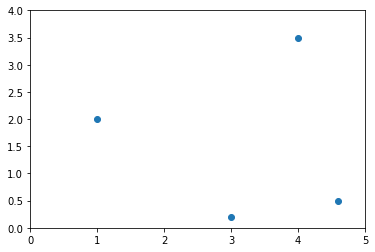

In [104]:
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0,5,0,4])

- Ofcourse we could also have stored the 4 vectors `([3,0.2], [4.0,3.5], [1.0,2.0], [4.6, 0.5])` as row vectors, instead of column vectors. 

In [105]:
P.T

array([[ 3. ,  0.2],
       [ 4. ,  3.5],
       [ 1. ,  2. ],
       [ 4.6,  0.5]])

In [106]:
P = np.array([[3,0.2],
             [4.0,3.5], 
             [1.0,2.0],
             [4.6, 0.5]])
x_coords_P, y_coords_P = P[:,0], P[:,1]
x_coords_P, y_coords_P

(array([ 3. ,  4. ,  1. ,  4.6]), array([ 0.2,  3.5,  2. ,  0.5]))

[0, 5, 0, 4]

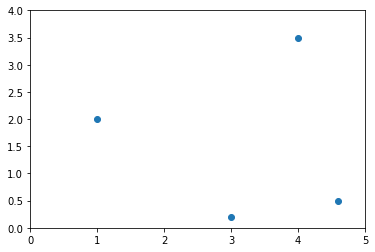

In [107]:
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0,5,0,4])

Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots. 

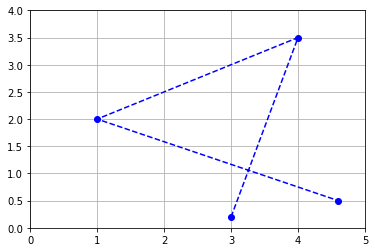

In [108]:
plt.plot(x_coords_P, y_coords_P, "bo")
# >> Plots the vectors with blue points

plt.plot(x_coords_P, y_coords_P, "b--")
# >> Draws a line connecting the points in order. 

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

- Or you can also represent it as _polygon_: Matplotlib's class expects an $ n \times 2 $ NumPy array, and not a $ 2 \times n$ array. 

In [109]:
P.shape

(4, 2)

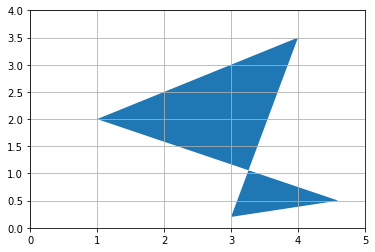

In [110]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P))
plt.axis([0,5 ,0 ,4])
plt.grid()

### Geometric applications of matrix operations:  



We saw earlier that: 
- vector addition results in geometric translation (CODE BLOCK 18) , 
- vector multiplication by scalar results in rescaling (zoomin in or out, centered on the origin , CODE BLOCK 23)
- vector dot product results in projecting a vector onto another vector, rescaling and measuring the resulting coordinate ( CODE BLOCK 36) .

- Similatly, matrix operations have very useful geometric applications. 

### Addition = Multiple Geometric Translations  
- First, adding two matrices together is equivalent to adding all their vectors together. 
- For example, let's create a $ 2 \times 4 $ matrix $H$, and add it to $P$, and look at the result. 

In [111]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]  
])

In [112]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H
P_moved

array([[ 3.5,  3.8,  1.2,  4.5],
       [ 0.6,  3.9,  3.5,  1.1]])

[ 0.5  0.4]
[ 3.   0.2]
[-0.2  0.4]
[ 4.   3.5]
[ 0.2  1.5]
[ 1.  2.]
[-0.1  0.6]
[ 4.6  0.5]


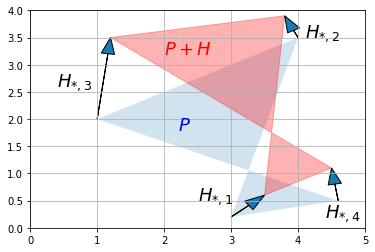

In [113]:
plt.gca().add_artist(Polygon(P.T, alpha=0.2))
# >> Using P.T as Polygon only accepts n x 2 arrays

plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
# >> Plotting the moved matrix.  

for vector, origin in zip(H.T, P.T):
    # Plotting all vectors of H.T
    # taking the origin as P.T 
    # The heads the vector would lie at the points
    # of P.T
    # The tails would lie at the points of moved P,
    # when we add h to it 
    print(vector)
    print(origin)
    # >> i.e Plotting a vector:
    # From(P.T):     Plus(H.T)     To(Move_P:
    # 3,0.2   0.5, 0.4  3.5, 0.6 (see in graph)
    # and so on...
    
    plot_vector2d(vector, origin=origin)
    

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

- If we add a matrix full of identical vectors, we get a simple geometric translation. 
    - As each part of the original polygon will move equally. 


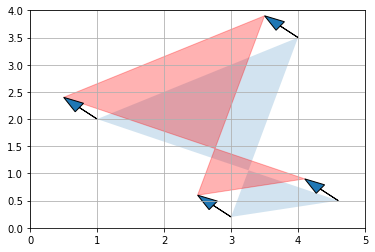

In [114]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

- Although matrices can only be added together if they have the same size, 
    - NumPy allows adding a row vector or a column vector to a matrix. 
- This is done by broadcasting:

```python

[[ 3. ,  4. ,  1. ,  4.6],    [[-0.5, -0.5, -0.5, -0.5],
                           +  
[ 0.2,  3.5,  2. ,  0.5]],      [ 0.4,  0.4,  0.4,  0.4]]

# IS THE SAME AS: 

[[ 3. ,  4. ,  1. ,  4.6],      [[-0.5],
                            +    [0.4]]             
[ 0.2,  3.5,  2. ,  0.5]],   

# (2,4)  + (2,1) # NP

# Rule 2: Repeating along columns 
# [[ 3. ,  4. ,  1. ,  4.6],    [[-0.5, -0.5, -0.5, -0.5],
#                            +  
# [ 0.2,  3.5,  2. ,  0.5]],      [ 0.4,  0.4,  0.4,  0.4]]
# (2,4) + (2,4) # Possible 

```


In [115]:
(array([ 3. ,  4. ,  1. ,  4.6]), array([-0.5, -0.5, -0.5, -0.5])),
 (array([ 0.2,  3.5,  2. ,  0.5]), array([ 0.4,  0.4,  0.4,  0.4]))

IndentationError: unexpected indent (<ipython-input-115-b607b2c1865d>, line 2)

### Scalar Multiplication: 
Multiplying a matrix by a scalar results in all its vectors being multiplied by that scalar, so unsurprisingly, the geometric result is a rescaling of the entire figure. For example, let's rescale our polygon by a factor of 60% (zooming out, centered on the origin):

In [ ]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

- As each element of the matrix was multiplied by the same scalar `0.6`, each vector in the matrix got scaled by a factor of `0.6`, which ultimately led to rescaling the polygonal by a factor of `0.6`. 

### Matrix Multiplication -Rotation: 